# 데이터 확인

2010년 1월부터 2019년 8월까지 외국인 관광객 목적별 입국 데이터셋(엑셀)파일 총 116개.

1. 데이터 형식 확인

In [5]:
import pandas as pd
kto_201001 = pd.read_excel("C:\\Users\\KIM EUNKI\\Dataset\\관광객 데이터(2010.01~2019.08)\\files\\kto_201001.xlsx"
                          , header = 1 #두 번째 줄이 컬럼명.
                          , usecols = "A:G" #필요컬럼 추출.
                          , skipfooter = 4) #마지막 4줄 생략.
kto_201001.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554


In [6]:
kto_201001.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


In [7]:
kto_201001.info() # 1개의 문자형 변수(국적)를 제외하고 모두 정수형 변수임을 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [9]:
kto_201001.describe() # 정수형 변수 확인.

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


In [11]:
#최솟값이 0인 데이터는 어떤 이유인지 확인.
condition = (kto_201001['관광'] == 0) \
          | (kto_201001['상용'] == 0) \
          | (kto_201001['공용'] == 0) \
          | (kto_201001['유학/연수'] == 0)
kto_201001[condition]
#|(or) 조건을 활용해 4가지 변수 중 하나라도 입국객수가 0인 국적으로 필터링.
#교포의 경우 통계 집계 시 기타 목적으로 분류됨을 확인.

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


2. 데이터프레임에 '기준년월' 항목 추가
    : 여러 데이터셋을 활용해야하기 때문에 기준년월 정보 필요

In [12]:
kto_201001['기준년월'] = '2010-01'
kto_201001.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,329131,18238,421,4339,80916,433045,2010-01
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01


3. 국적 데이터만 남기기

In [13]:
#국적 데이터에 어떤 항목들이 있는지 확인.
kto_201001['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [25]:
#대륙(continent) 레벨의 데이터가 존재하므로 국가명, 기타대륙을 제외한 아시아주 포함 7개 데이터를 저장하기위해 continents_list 변수 생성
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [26]:
# 만들어놓은 continents_list에 포함되지 않는 국가명만 선택하여 확인.
condition = (kto_201001.국적.isin(continents_list) == False)
kto_201001_country = kto_201001[condition]
kto_201001_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [27]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
5,태국,13374,39,13,53,4335,17814,2010-01


In [28]:
#인덱스가 1번부터 시작(0번이었던 아시아주가 제거됨). 0번부터 시작하도록 다시 세팅.
kto_201001_country_newindex = kto_201001_country.reset_index(drop = True)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,202825,1750,89,549,3971,209184,2010-01
1,대만,35788,41,17,37,516,36399,2010-01
2,홍콩,13874,55,0,21,595,14545,2010-01
3,마카오,554,0,0,0,0,554,2010-01
4,태국,13374,39,13,53,4335,17814,2010-01


4. 대륙 컬럼 만들기

In [30]:
#국가별로 매칭되는 대륙을 생각해보고 만들어야 함. 기존 데이터는 아시아주 하위그룹으로 아시아 국가들로 구성되어 있어 순서대로 만들면 됨.
#아시아주 25개, 미주 5개, 유럽(구주) 23개, 오세아니아 3개, 아프리카주 2개, 기타대륙 1개, 교포소계 1개.
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [31]:
#만들어진 continents 변수로 데이터프레임에 '대륙' 컬럼 추가하기.
kto_201001_country_newindex['대륙'] = continents
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아


In [32]:
kto_201001_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,730,0,4,4,168,906,2010-01,오세아니아
56,남아프리카공화국,214,27,0,2,545,788,2010-01,아프리카
57,아프리카 기타,349,594,25,86,296,1350,2010-01,아프리카
58,국적미상,10,3,0,0,0,13,2010-01,기타대륙
59,교포,0,0,0,0,22537,22537,2010-01,교포


5. 국적별 관광객 비율 살펴보기

In [35]:
#관광객 비율(%) 컬럼 생성.
kto_201001_country_newindex['관광객비율(%)'] = \
    round(kto_201001_country_newindex['관광'] / kto_201001_country_newindex['계'] * 100, 1)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [36]:
#관광객 비율이 높은 순으로 내림차순 정렬.
kto_201001_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2010-01,아시아,92.5


In [37]:
#대륙별 관광객 비율 평균(pivot_table 함수 활용)
kto_201001_country_newindex.pivot_table(values = '관광객비율(%)',
                                        index = '대륙',
                                        aggfunc = 'mean')
#소득 수준이 낮은 국가(아프리카)에서는 관광 목적의 방문이 많지 않음을 알 수 있다.

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


6. 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

In [38]:
#2010년 1월 외국인 관광객 전체 수 구하기(tourist_sum 변수 생성)
tourist_sum = sum(kto_201001_country_newindex['관광'])
tourist_sum
#총 약 40만명.

400818

In [39]:
#'전체비율(%)' 컬럼 생성
kto_201001_country_newindex['전체비율(%)'] = \
    round(kto_201001_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [43]:
#'전체비율(%)' 컬럼 기준 내림차순 정렬하여 확인
kto_201001_country_newindex.sort_values(by = '전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5


***
# 데이터 전처리 과정 함수로 만들기
1. 불러올 데이터 형태 파악
2. 엑셀 파일 파이썬으로 불러오기
3. 데이터 탐색
4. 기준년월 컬럼 추가
5. 국적 데이터만 남기기(대륙 데이터 제거)
6. 대륙 컬럼 생성
7. 국적별 관광객 비율(%)

In [44]:
#2010년 1월부터 2019년 8월까지 총 116개 엑셀파일 통합하기(전처리 과정 포함)

#create_kto_data 함수 생성
def create_kto_data(yy, mm):
#1. 불러올 엑셀 파일 경로 지정
    file_path = 'C:\\Users\\KIM EUNKI\\Dataset\\관광객 데이터(2010.01~2019.08)\\files\\kto_{}{}.xlsx'.format(yy, mm)

#2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')

#3. '기준년월' 컬럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)

#4. '국적' 컬럼에서 대륙 데이터 제거
    ignore_list = ['아시아주', '구주', '아프리카주', '미주', '대양주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False) #대륙정보 미포함 조건
    df_country = df[condition].reset_index(drop = True) #대륙정보 제거

#5. '대륙' 컬럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
    df_country['대륙'] = continents

#6. '관광객비율(%)' 컬럼 추가
    df_country['관광객비율(%)'] = \
        round(df_country['관광'] / df_country['계'] * 100, 1)

#7. '전체비율(%)' 컬럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = \
        round(df_country['관광'] / tourist_sum * 100, 1)

#8. 결과 출력
    return(df_country)

In [47]:
#함수 테스트
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [67]:
#반복문을 활용해 116개 데이터 합치기
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2) #zfill 함수를 이용하여 월단위를 0을 포함한 2자리로 출력
        yymm = '{}{}'.format(yy, mm_str)

In [93]:
#데이터를 담을 빈 데이터프레임 만들기
df = pd.DataFrame()

In [94]:
#데이터 통합하여 df에 담기
#2019년 8월 이후로는 데이터가 없기 때문에 에러를 무시할 수 있도록 try 구문 활용
for yy in range(2010, 2020):
    for mm in range(1, 13):
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2)) #
            df = df.append(temp, ignore_index = True)
        except:
            pass

In [95]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [96]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


In [105]:
#통합 데이터를 하나의 엑셀파일로 저장
df.to_excel('C:\\Users\\KIM EUNKI\\Dataset\\관광객 데이터(2010.01~2019.08)\\files\\kto_total.xlsx', index = False)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


***
# 데이터 시각화

In [112]:
#한글 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

국적 별 시계열 그래프

In [113]:
# 중국 국적 데이터 필터링
condition = (df['국적'] == '중국')
df_china = df[condition]
df_china.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


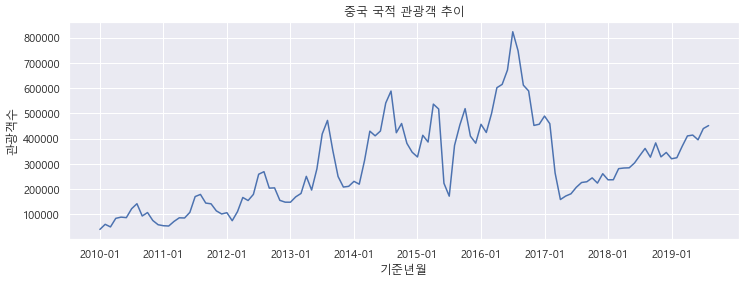

In [118]:
plt.figure(figsize = (12, 4)) #그래프 크기 조절
plt.plot(df_china['기준년월'], df_china['관광']) #그래프 내용 설정
plt.title('중국 국적 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']) #x축 눈금 값 설정
plt.show()

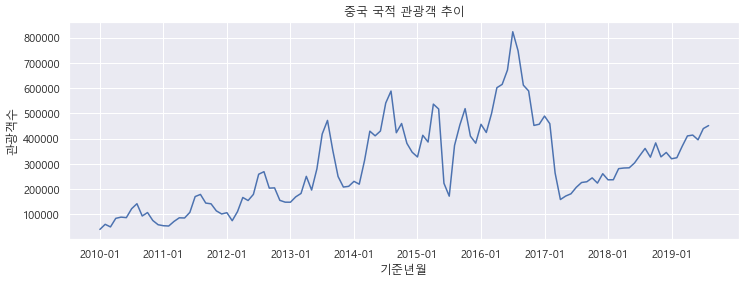

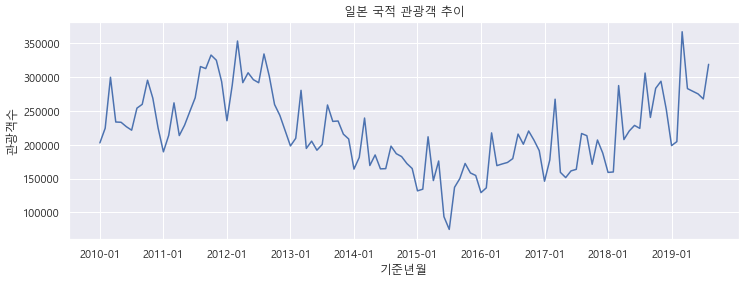

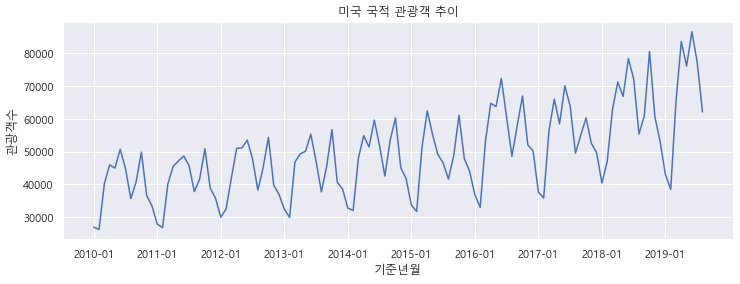

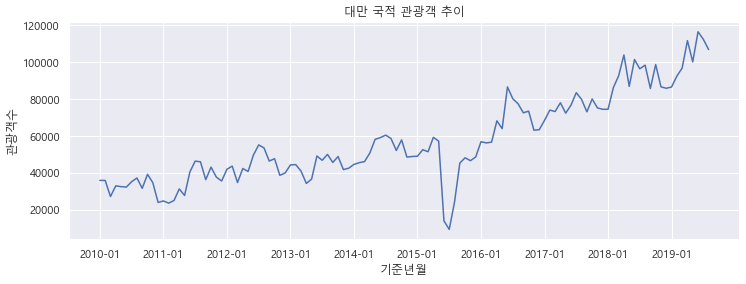

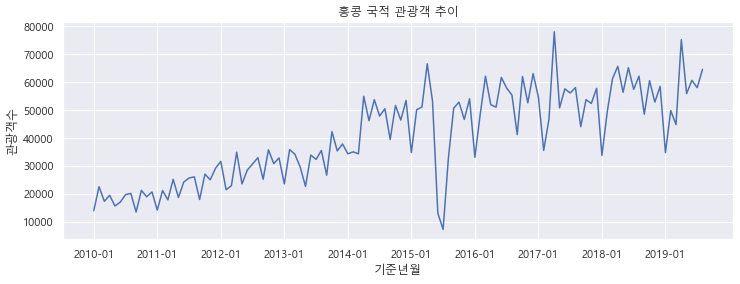

In [127]:
#반복문 활용하여 관광객 수 상위 5개의 국가 그래프 그리기
cntry_list = ['중국', '일본', '미국', '대만', '홍콩']

for cntry in cntry_list:
    condition = (df['국적'] == cntry) #국적 관광객만 호출
    df_filter = df[condition]
#그래프 그리기
    plt.figure(figsize = (12, 4)) #그래프 크기 조절
    plt.plot(df_filter['기준년월'], df_filter['관광']) #그래프 내용 설정
    plt.title('{} 국적 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']) #x축 눈금 값 설정
    plt.show()

In [139]:
# 상위 5개 국가 통합 그래프
condition = (df['국적'] == '중국')
df_china = df[condition]
condition = (df['국적'] == '미국')
df_usa = df[condition]
condition = (df['국적'] == '대만')
df_tai = df[condition]
condition = (df['국적'] == '홍콩')
df_hong = df[condition]
condition = (df['국적'] == '일본')
df_jap = df[condition]

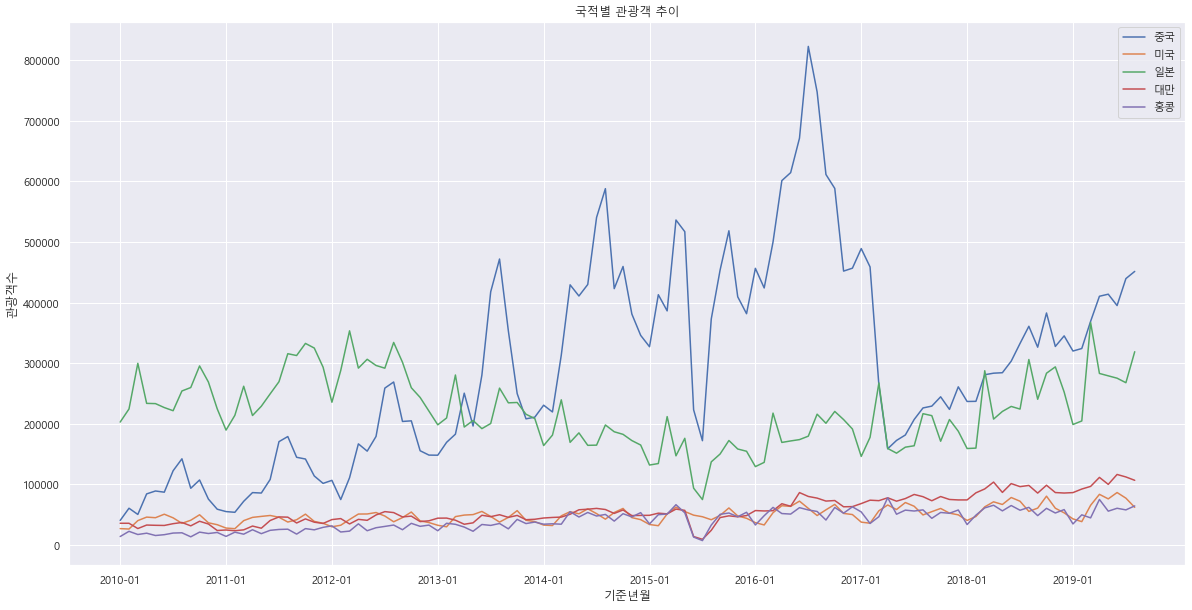

In [145]:
plt.figure(figsize = (20, 10)) #그래프 크기 조절
plt.plot(df_china['기준년월'], df_china['관광'], label = '중국') #그래프 내용 설정
plt.plot(df_usa['기준년월'], df_usa['관광'], label = '미국')
plt.plot(df_jap['기준년월'], df_jap['관광'], label = '일본')
plt.plot(df_tai['기준년월'], df_tai['관광'], label = '대만')
plt.plot(df_hong['기준년월'], df_hong['관광'], label = '홍콩')
plt.title('국적별 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']) #x축 눈금 값 설정
plt.legend() #우측 상단(기본) 범주 표시
plt.show()